# Hazırlayan: Ömer Faruk Aydın No:171024002
# LAB-5

# Problem-1

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

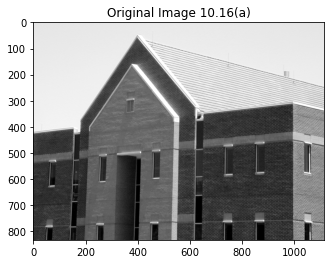

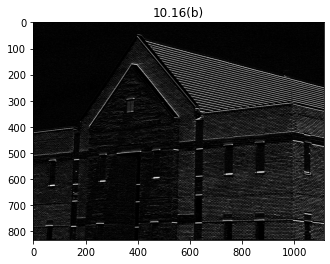

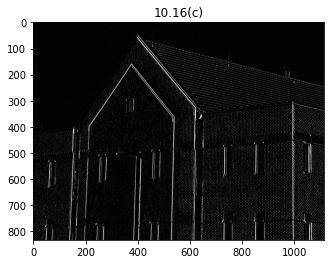

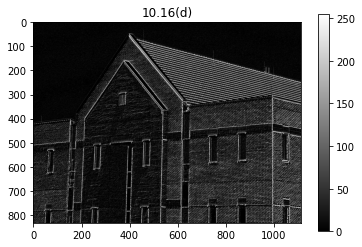

In [26]:
#First, fig.10.16(d) will be obtained. 
original_img=cv.imread("Fig1016(a)(building_original).pgm",0) #Reading original image
#out=cv.normalize(original_img.astype("float"),None,0.0,255.0,cv.NORM_MINMAX) #Normalize the image

plt.imshow(original_img,cmap="gray")
plt.title("Original Image 10.16(a)")
plt.show()

filter=np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) #Sobel mask for x direction
dst = cv.filter2D(original_img,-1,filter)

abssobelx=abs(dst) #Take its magnitude

plt.imshow(abssobelx,cmap="gray")
plt.title("10.16(b)") 
plt.show()

filter=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])#Sobel mask for y direction
dsty = cv.filter2D(original_img,-1,filter)

abssobely=abs(dsty)

plt.imshow(abssobely,cmap="gray")
plt.title("10.16(c)") 
plt.show()

sobel=abssobelx+abssobely

plt.imshow(sobel,cmap="gray")
plt.title("10.16(d)") 
plt.colorbar()
plt.show()

In [27]:
mu = 0
p = np.empty(256,dtype=object)
for i in range(0,256):
    p[i] = (np.count_nonzero(sobel == i)/ (sobel.shape[0] *sobel.shape[1])) #Probability of every pixel

for i in range(0,256):
    mu += i*p[i]

q1 = np.empty(256,dtype=object)
q2 = np.empty(256,dtype=object)
mu1 = np.empty(256,dtype=object)
mu2 = np.empty(256,dtype=object)
sigma_squared_B = np.empty(256,dtype=object)

q1[0] = 0
mu1[0] = 0

for i in range(1,256):
    q1[i] = q1[i-1] + p[i-1]

q2 = 1 - q1
for i in range(1,256):
    mu1[i] = (q1[i-1] * mu1[i-1]+ i*p[i])/q1[i] #Mean of group 1
    
mu2 = (mu - q1*mu1)/q2 #Mean of group 2
sigma_squared_B= q1 * q2 * (mu1-mu2) * (mu1-mu2)
max_value_index = np.argmax(sigma_squared_B) #Obtains the max value's index
max_value_index

81

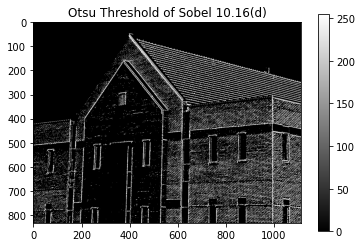

In [28]:
T = max_value_index
sobel[sobel >= T] = 255 #If above threshold, assign 255
sobel[sobel < T] = 0 #If below threshold, assign 0

plt.imshow(sobel,cmap="gray")
plt.title("Otsu Threshold of Sobel 10.16(d)")
plt.colorbar()
plt.show()

10.16(d) görüntüsüne bakıldığında keskin geçiş olmayan yerler de eşikten geçmiştir dolayısıyla binanın duvarları da beyaz gözüküyor. Üstelik çatıdaki kiremitler de bunun için gözükmektedir. Oysa 10.20(b) görüntüsünde keskin geçiş olmayan her yer bastırılmıştır ve sadece edge'ler kalmıştır. Bunun sebebi 10.16(d) görüntüsüne yumuşatma yapılmamasıdır. 

1.247529411764706


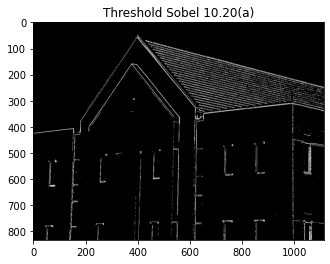

0.6021270588235295


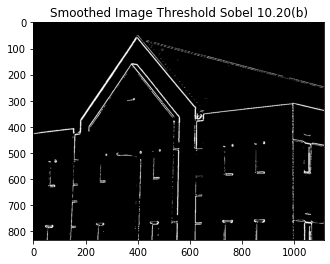

In [29]:
original_img=cv.imread("Fig1016(a)(building_original).pgm",0) #Read image
out=cv.normalize(original_img.astype("float"),None,0.0,1.0,cv.NORM_MINMAX)

sobelx=cv.Sobel(out,-1,0,1,ksize=3) #x direction Sobel mask
sobely=cv.Sobel(out,-1,1,0,ksize=3) #y direction Sobel mask

sobel=abs(sobelx)+abs(sobely)

T=np.amax(sobel)*0.33 #Threshold selected as %33 of the highest value.
print(T)

sobel[sobel >= T] = 255 #If above threshold, assign 255
sobel[sobel < T] = 0 #If below threshold, assign 0

plt.imshow(sobel,cmap="gray")
plt.title("Threshold Sobel 10.20(a)")
plt.show()

smoothed_img=cv.blur(out,(5,5)) #Smoothed image

sobelx=cv.Sobel(smoothed_img,-1,0,1,ksize=3) #x direction Sobel mask
sobely=cv.Sobel(smoothed_img,-1,1,0,ksize=3) #y direction Sobel mask

sobel=abs(sobelx)+abs(sobely) 

T=np.amax(sobel)*0.33 #Threshold selected as %33 of the highest value.
print(T)

sobel[sobel >= T] = 255 #If above threshold, assign 255
sobel[sobel < T] = 0 #If below threshold, assign 0

plt.imshow(sobel,cmap="gray")
plt.title("Smoothed Image Threshold Sobel 10.20(b)")
plt.show()

# Problem 2

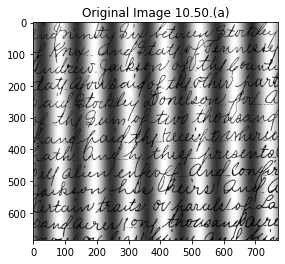

In [30]:
original_img=cv.imread("Fig1050(a)(sine_shaded_text_image).pgm",0) #Read image
plt.imshow(original_img,cmap="gray")
plt.title("Original Image 10.50.(a)")
plt.show()

In [31]:
mu = 0
p = np.empty(256,dtype=object)
for i in range(0,256):
    p[i] = (np.count_nonzero(original_img == i)/ (original_img.shape[0] *original_img.shape[1]))

for i in range(0,256):
    mu += i*p[i]
    
print(mu)
q1 = np.empty(256,dtype=object)
q2 = np.empty(256,dtype=object)
mu1 = np.empty(256,dtype=object)
mu2 = np.empty(256,dtype=object)
sigma_squared_B = np.empty(255,dtype=object)

q1[0] = 0
mu1[0] = 0

for i in range(1,256):
    q1[i] = q1[i-1] +p[i-1]

q2 = 1 - q1
for i in range(1,256):
    mu1[i] = (q1[i-1] * mu1[i-1]+ i*p[i])/q1[i]
    
mu2 = (mu - q1*mu1)/q2
sigma_squared_B= q1 * q2 * (mu1-mu2) * (mu1-mu2)
max_value_index = np.argmax(sigma_squared_B)

134.13722828139393


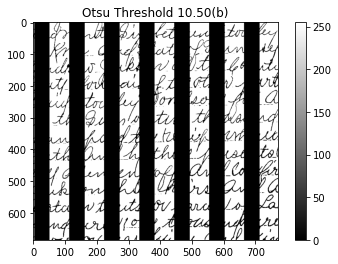

In [32]:
T = max_value_index
original_img[original_img >= T] = 255 #If above threshold, assign 255
original_img[original_img < T] = 0 #If below threshold, assign 0

plt.imshow(original_img,cmap="gray")
plt.title("Otsu Threshold 10.50(b)")
plt.colorbar()
plt.show()

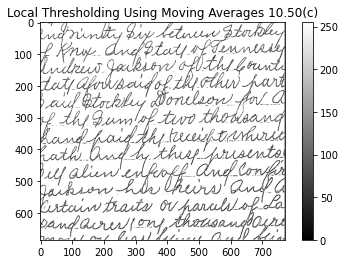

In [33]:
original_img=cv.imread("Fig1050(a)(sine_shaded_text_image).pgm",0) #Read image
thresh = cv.adaptiveThreshold(original_img, 255, cv.ADAPTIVE_THRESH_MEAN_C,
                                          cv.THRESH_BINARY, 3, 2)
plt.imshow(thresh,cmap="gray")
plt.title("Local Thresholding Using Moving Averages 10.50(c)")
plt.colorbar()
plt.show()